<a href="https://colab.research.google.com/github/joelfestevez/DataScience_GColabNotebooks/blob/main/Platzi_FundamentosP_ML_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias y modelos pertinentes
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#Leemos el dataframe y nos fijamos que Outcome es el dato que nos interesa para la regresión logistica
#Pues este modelo da un resultado binario: 0 o 1, Si o No
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Vemos la extensión del DF
diabetes.shape

(768, 9)

In [5]:
#Cargamos todas las columnas del DF para entrenar el modelo
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x=diabetes[feature_cols] #Vemos que la regresión será multidimensional
y=diabetes.Outcome

In [11]:
# Convensión: En mayuscula van matrices y en minuscula vectores
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state= 0)
#Entrenamos con el 85% de los datos y probamos con el 25% restante
#No queremos una semilla random que nos esté cambiando nouestros datos, entonces ese parámetro lleva 0

In [7]:
#Creamos el modelo cargando el método LR
#con la función fit hacemos el entrenamiento
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test) #Queremos predecir nuestra información de prueba

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [12]:
#Vemos lo que el modelo ha clasificado
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [14]:
#Matriz de confusion
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(0.5, 257.44, 'Etiqueta de predicción')

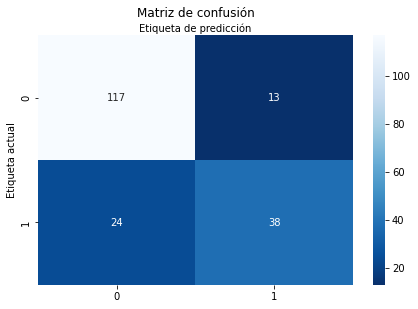

In [20]:
#Hacemos plot de la cnf para evaluar el modelo
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap='Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')
#Leemos la matriz de confusión en diagonal
#Segundo y cuarto cuadrante son los que nos interesa

In [22]:
#Otra forma de evaluar es con accuracy_score
print ('Exactitud', metrics.accuracy_score(y_test, Y_pred))
#80% de probabilidad de que nuestro modelo dado nuevos datos podamos determinar
#si el individuo tiene o no diabetes 
#Es un buen modelo!

Exactitud 0.8072916666666666
